In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
def zero_pad(X,pad):
  X_pad = np.pad(X,((0,0),(pad,pad),(pad,pad),(0,0)),'constant',constant_values=(0,0))
  return X_pad

In [0]:
%matplotlib inline

In [0]:
def conv_single_step(a_slice_prev,W,b):
  s=a_slice_prev
  Z=np.sum(s)
  
  Z1=float(Z+b)
  return Z1

In [0]:
def conv_forward(A_prev,W,b,hyper_parameters):
  (m,n_H_prev,n_W_prev,n_C_prev)=np.shape(A_prev)
  fig,axarr=plt.subplots(1,2)
  print("\nNumber of training examples = ",m)
  print("\nHeight dimension of output of previous layer =",n_H_prev)
  print("\nWidth  dimension of output of previous layer =",n_W_prev)
  print("\nNumber of channels in the  output of previous layer =",n_C_prev)

  (f,f,n_C_prev,n_C)=np.shape(W)

  print("\nHeight dimension of filter kernel =",f)
  print("\nWidth  dimension of filter kernel =",f)
  print("\nTotal number of filters or number of channels after applying convolutional layer =",n_C)

  stride=hyper_parameters['stride']
  pad=hyper_parameters['pad']

  print("\nNumber of steps used by filter to move or parse across the output of previous layer =",stride)
  print("\nAmount of padding around each image on vertical and horizontal dimensions = ",pad)

  print("\nComputing the height and width dimension of the output using formulas:-\n\n") 
  print("\n       | n_H_prev - f + 2*pad |                | n_W_prev - f + 2*pad |")    
  print("\n n_H = |----------------------| + 1     n_W =  |----------------------| + 1")
  print("\n       |       stride         |                |       stride         |")

  n_H = int((n_H_prev-f+2*pad)/stride)+1
  n_W = int((n_W_prev-f+2*pad)/stride)+1

  print("\nHeight dimension of the result = ",n_H) 
  print("\nWidth  dimension of the result = ",n_W) 

  Z = np.zeros((m,n_H,n_W,n_C))
  print("\nDimensions of the result = ",Z.shape)
  

  print("\nPadding the input data by zeros \n")
  A_prev_pad=zero_pad(A_prev,pad)
  print("\nDimensions after padding = ",A_prev_pad.shape)
  

  print("\n Applying convolutional filters on the input data .........")
  for i in range(m):
    a_prev_pad = A_prev_pad[i,:,:,:]
    
    for h in range(n_H):
      vert_start = h*stride
      vert_end   = h*stride + f

      for w in range(n_W):
        horiz_start = w*stride
        horiz_end   = w*stride + f

        for c in range(n_C):
          a_slice_prev = a_prev_pad[vert_start:vert_end,horiz_start:horiz_end,:]

          weights = W[:,:,:,c]
          biases  = b[:,:,:,c]

          Z[i,h,w,c] = conv_single_step(a_slice_prev,weights,biases)
          axarr[0].imshow(A_prev[i,:,:,0])
          axarr[1].imshow(A_prev_pad[i,:,:,0])
          
          
  assert(Z.shape == (m,n_H,n_W,n_C))

  cache = (A_prev,W,b,hyper_parameters)

  return Z,cache



Number of training examples =  10

Height dimension of output of previous layer = 5

Width  dimension of output of previous layer = 7

Number of channels in the  output of previous layer = 4

Height dimension of filter kernel = 3

Width  dimension of filter kernel = 3

Total number of filters or number of channels after applying convolutional layer = 8

Number of steps used by filter to move or parse across the output of previous layer = 2

Amount of padding around each image on vertical and horizontal dimensions =  1

Computing the height and width dimension of the output using formulas:-



       | n_H_prev - f + 2*pad |                | n_W_prev - f + 2*pad |

 n_H = |----------------------| + 1     n_W =  |----------------------| + 1

       |       stride         |                |       stride         |

Height dimension of the result =  3

Width  dimension of the result =  4

Dimensions of the result =  (10, 3, 4, 8)

Padding the input data by zeros 


Dimensions after padding

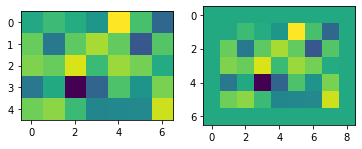

In [173]:
np.random.seed(1)
A_prev=np.random.randn(10,5,7,4)
W = np.random.randn(3,3,4,8)
b=np.random.randn(1,1,1,8)
hyper_parameters= {"pad":1,"stride":2}

Z,cache_conv=conv_forward(A_prev,W,b,hyper_parameters)

print("\nZ's mean = \n",np.mean(Z))
print("\nZ[3,2,1]= \n",Z[3,2,1])
print("\ncache_conv[0][1][2][3] = \n ",cache_conv[0][1][2][3])